Saving Walmart_Sales.csv to Walmart_Sales (1).csv
Shape: (6435, 8)

Columns: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None

First 5 rows:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44      

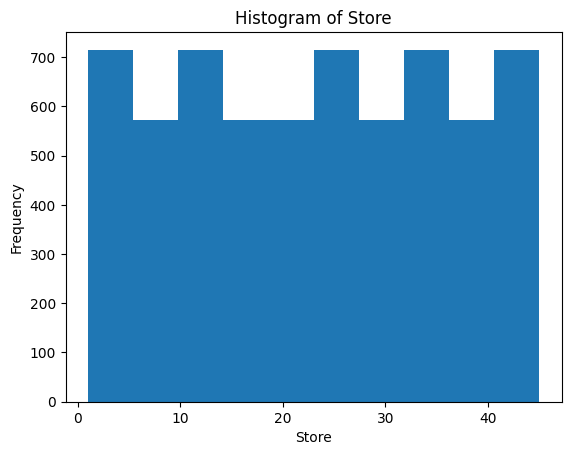

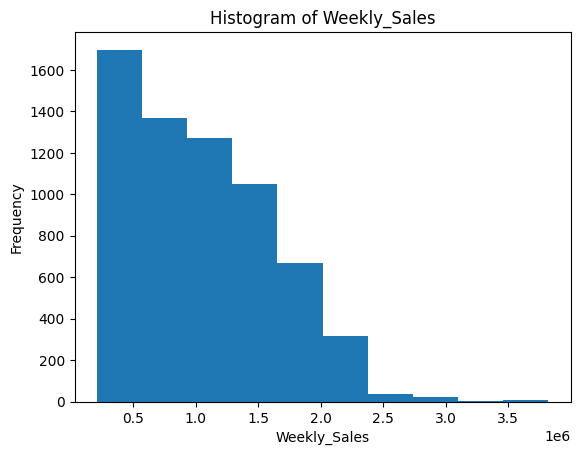

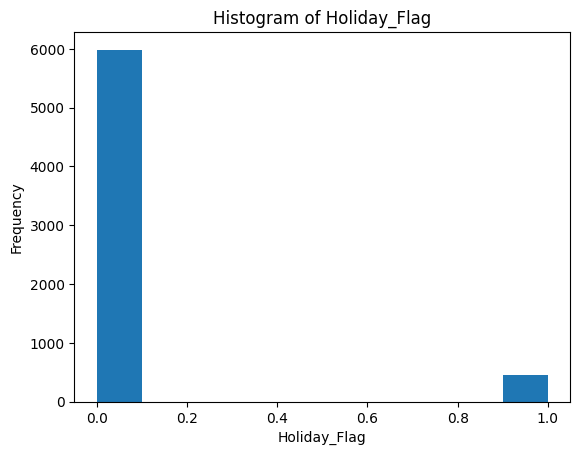

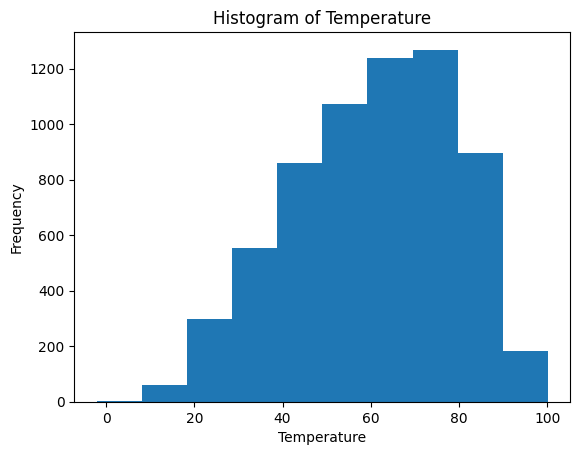

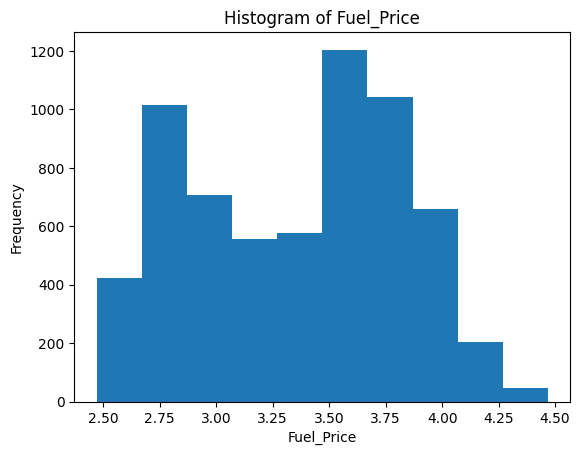

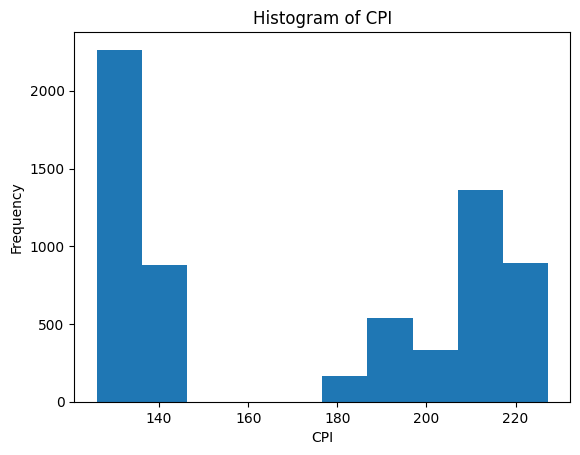

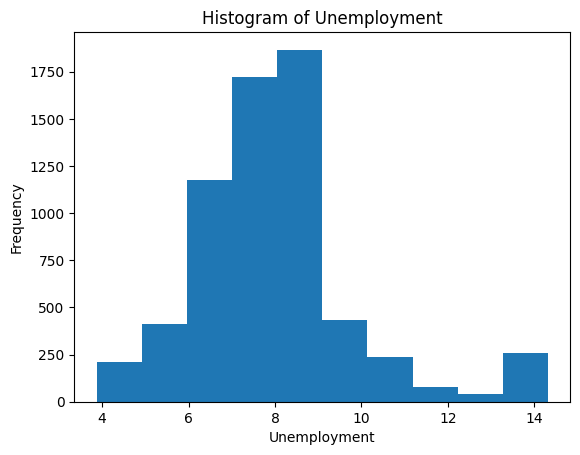

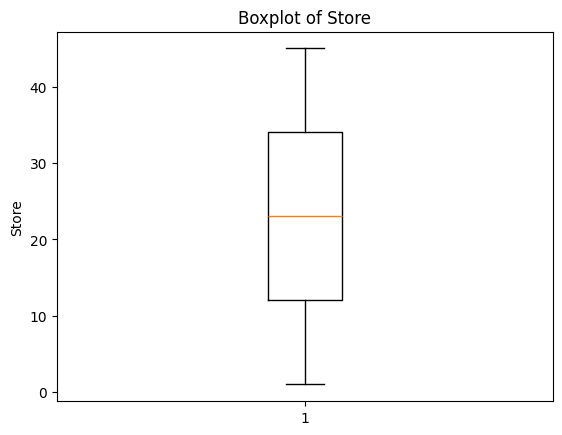

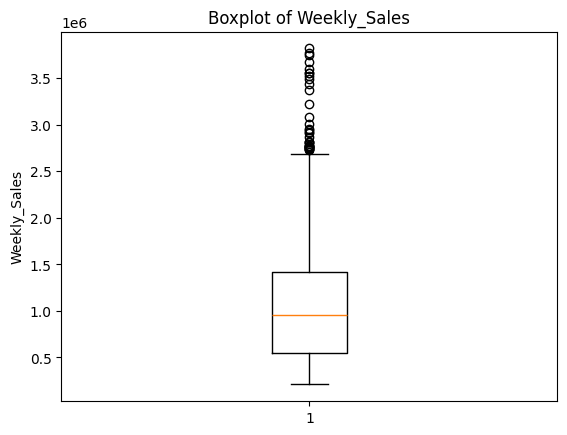

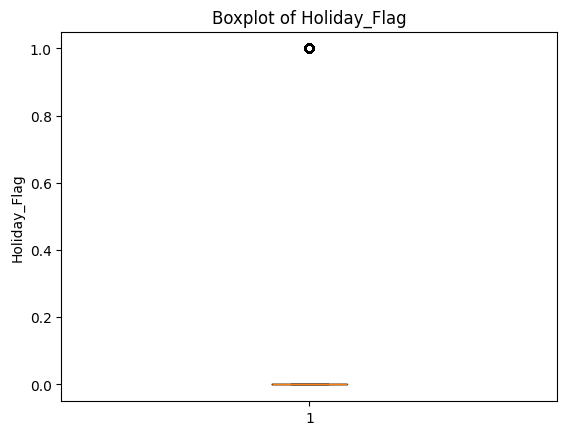

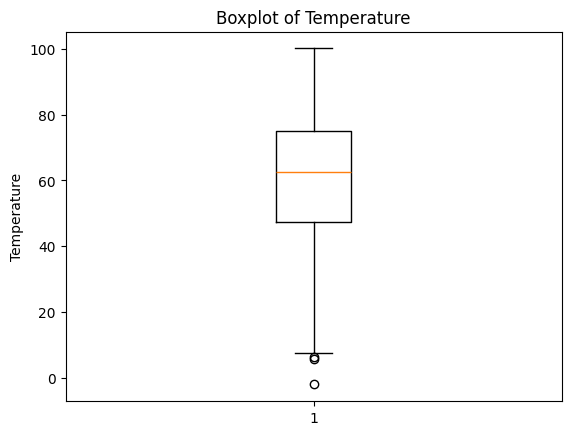

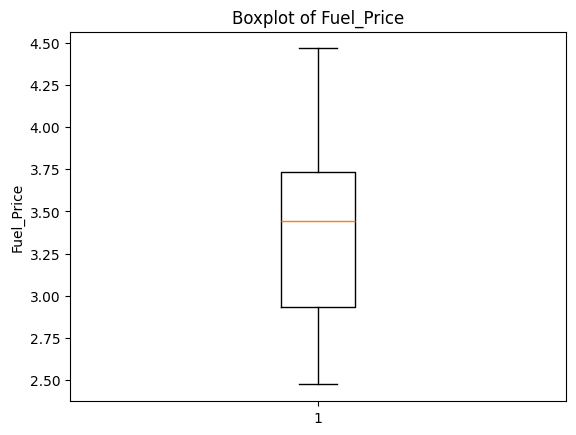

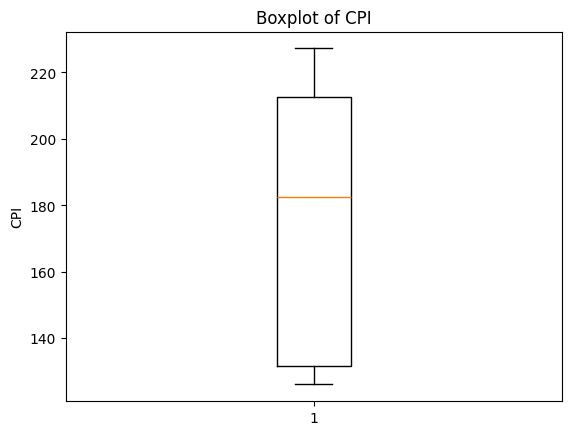

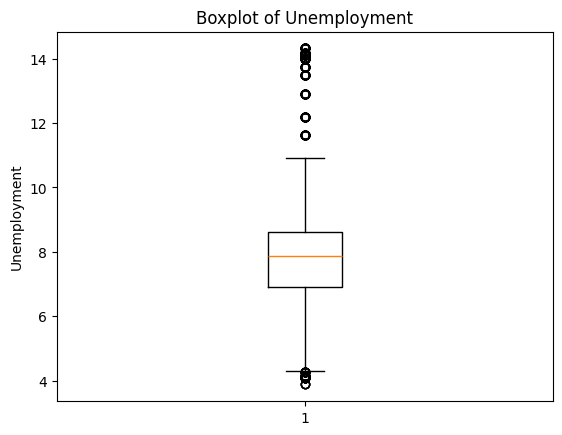

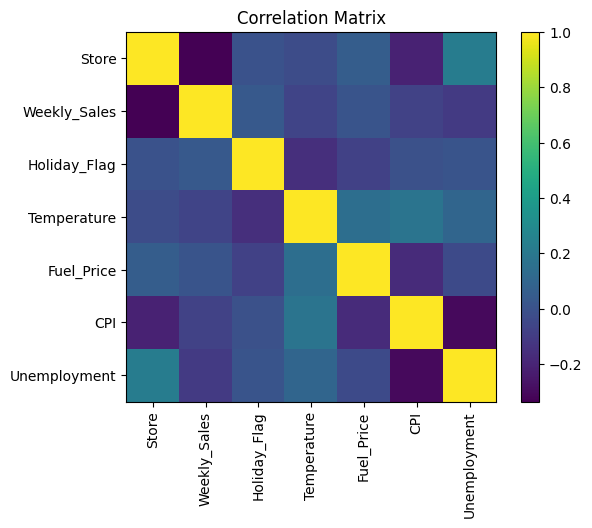

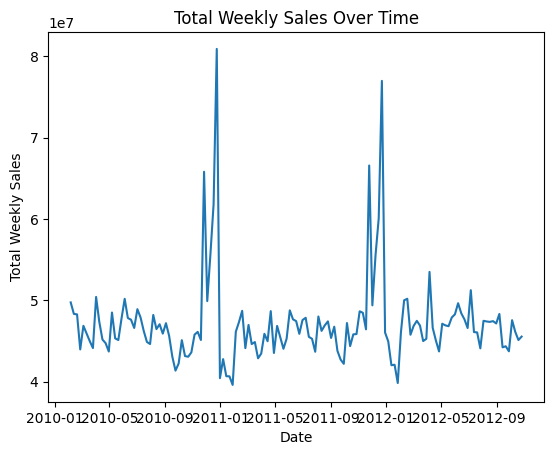

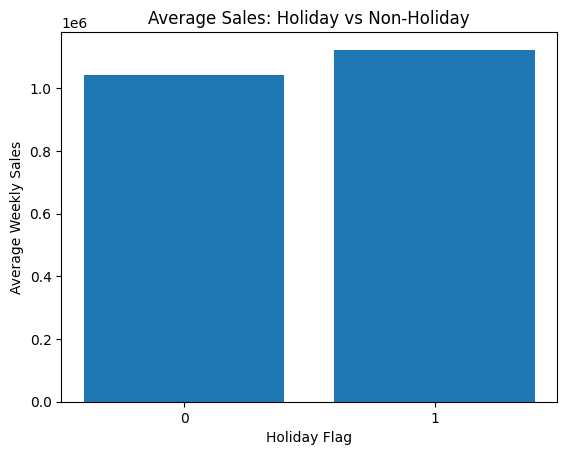


EDA Completed ✅


In [1]:
# ===============================
# 📌 Walmart Sales EDA - Colab
# ===============================

# Install (if needed)
# !pip install pandas matplotlib numpy seaborn

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# 📌 Upload Dataset
# ===============================
from google.colab import files
uploaded = files.upload()

# Load dataset (change name if needed)
df = pd.read_csv("Walmart_Sales.csv")

# ===============================
# 📌 Basic Info
# ===============================
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

# ===============================
# 📌 Missing Values
# ===============================
print("\nMissing Values:")
print(df.isnull().sum())

# ===============================
# 📌 Statistical Summary
# ===============================
print("\nStatistical Summary:")
print(df.describe())

# ===============================
# 📌 Convert Date Column
# ===============================
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# ===============================
# 📌 Histograms
# ===============================
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    plt.figure()
    plt.hist(df[col].dropna())
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# ===============================
# 📌 Boxplots (Outlier Detection)
# ===============================
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

# ===============================
# 📌 Correlation Heatmap (Manual)
# ===============================
corr = df.corr(numeric_only=True)

plt.figure()
plt.imshow(corr)
plt.title("Correlation Matrix")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# ===============================
# 📌 Sales Trend Over Time
# ===============================
sales_time = df.groupby("Date")["Weekly_Sales"].sum()

plt.figure()
plt.plot(sales_time.index, sales_time.values)
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.show()

# ===============================
# 📌 Holiday vs Non-Holiday Sales
# ===============================
holiday_sales = df.groupby("Holiday_Flag")["Weekly_Sales"].mean()

plt.figure()
plt.bar(holiday_sales.index.astype(str), holiday_sales.values)
plt.title("Average Sales: Holiday vs Non-Holiday")
plt.xlabel("Holiday Flag")
plt.ylabel("Average Weekly Sales")
plt.show()

print("\nEDA Completed ✅")


In [20]:
!pip install joblib scikit-learn pandas numpy


In [21]:
from google.colab import files
files.upload()


Saving Walmart_Sales.csv to Walmart_Sales (5).csv


{'Walmart_Sales (5).csv': b'Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment\r\n1,05-02-2010,1643690.9,0,42.31,2.572,211.0963582,8.106\r\n1,12-02-2010,1641957.44,1,38.51,2.548,211.2421698,8.106\r\n1,19-02-2010,1611968.17,0,39.93,2.514,211.2891429,8.106\r\n1,26-02-2010,1409727.59,0,46.63,2.561,211.3196429,8.106\r\n1,05-03-2010,1554806.68,0,46.5,2.625,211.3501429,8.106\r\n1,12-03-2010,1439541.59,0,57.79,2.667,211.3806429,8.106\r\n1,19-03-2010,1472515.79,0,54.58,2.72,211.215635,8.106\r\n1,26-03-2010,1404429.92,0,51.45,2.732,211.0180424,8.106\r\n1,02-04-2010,1594968.28,0,62.27,2.719,210.8204499,7.808\r\n1,09-04-2010,1545418.53,0,65.86,2.77,210.6228574,7.808\r\n1,16-04-2010,1466058.28,0,66.32,2.808,210.4887,7.808\r\n1,23-04-2010,1391256.12,0,64.84,2.795,210.4391228,7.808\r\n1,30-04-2010,1425100.71,0,67.41,2.78,210.3895456,7.808\r\n1,07-05-2010,1603955.12,0,72.55,2.835,210.3399684,7.808\r\n1,14-05-2010,1494251.5,0,74.78,2.854,210.3374261,7.808\r\n1,21-05-2010,1399

In [22]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv("Walmart_Sales.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Convert Date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Feature engineering
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

# Remove Date column
df.drop("Date", axis=1, inplace=True)

# Split data
X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train model
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_train)

# Save model as .pkl file
joblib.dump(model, "walmart_model.pkl")

print("✅ PKL file created successfully!")


✅ PKL file created successfully!


In [23]:
import os
print(os.listdir())


['.config', 'Walmart_Sales (1).csv', 'Walmart_Sales (5).csv', 'Walmart_Sales (2).csv', 'Walmart_Sales.csv', 'Walmart_Sales (3).csv', 'walmart_model.pkl', 'Walmart_Sales (4).csv', 'sample_data']


In [24]:
files.download("walmart_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
!pip install joblib pandas numpy matplotlib scikit-learn

In [26]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [28]:
from google.colab import files
uploaded = files.upload()


Saving Walmart_Sales.csv to Walmart_Sales (6).csv


In [29]:
from google.colab import files
uploaded = files.upload()

Saving walmart_model.pkl to walmart_model (1).pkl


In [30]:
df = pd.read_csv("Walmart_Sales.csv")
model = joblib.load("walmart_model.pkl")

print("Model Loaded Successfully ✅")


Model Loaded Successfully ✅


In [31]:
df.columns = df.columns.str.strip()

if "Date" in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

    df.drop("Date", axis=1, inplace=True)


In [34]:
X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]

In [35]:
y_pred = model.predict(X)

In [36]:
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 32234.979126099424
RMSE: 67210.31286777994
R2 Score: 0.9858154132566866


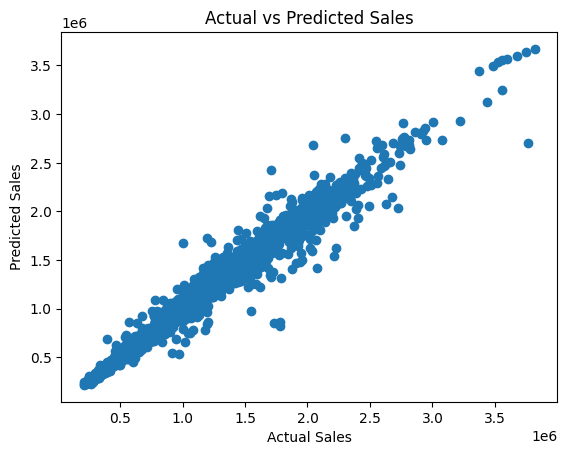

In [37]:
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()